In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50504_R')

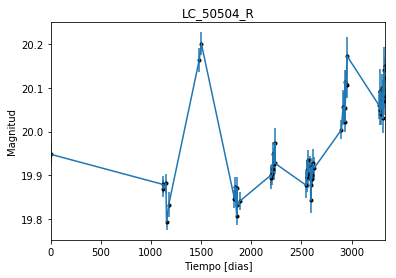

In [2]:
data = np.genfromtxt('LC_50504_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50504_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

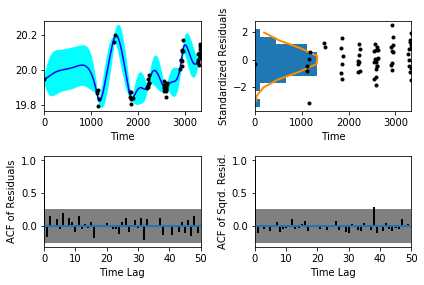

In [5]:
sample.assess_fit()

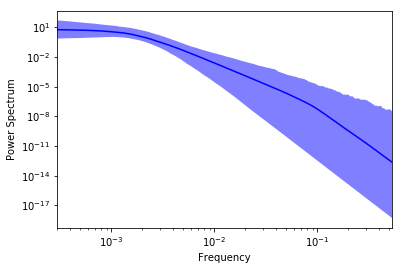

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50504_R')

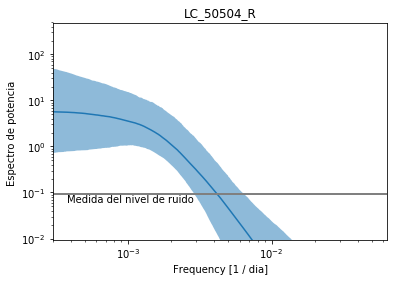

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50504_R')

Text(0.5,1,'Prediccion , valor esperado LC_50504_R')

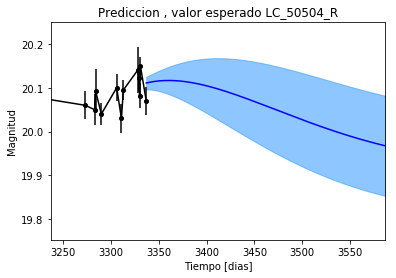

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50504_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50504_R')

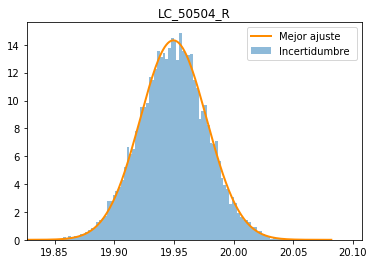

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50504_R')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_R')

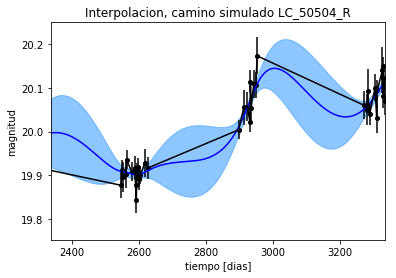

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_R')

Text(0.5,1,'Interpolacion, camino simulado LC_50504_R')

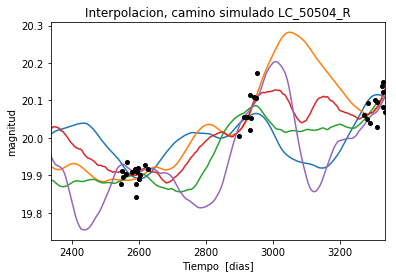

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50504_R')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 811.585149695
Median: 0.00502183891141
Standard deviation: 0.162077097422
68% credibility interval: [ 0.00074999  0.09521857]
95% credibility interval: [  3.53168656e-04   6.39886584e-01]
99% credibility interval: [  3.12982885e-04   9.95010139e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 348.27764498
Median: 0.00191336713029
Standard deviation: 0.0638573098997
68% credibility interval: [ 0.00059311  0.01647307]
95% credibility interval: [ 0.00033542  0.19357169]
99% credibility interval: [  3.08278565e-04   4.23293027e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 338.545900715
Median: 0.00445706510196
Standard

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1430.17459608
Median: 129.123536368
Standard deviation: 1.77676824872
68% credibility interval: [ 127.12676024  130.53559973]
95% credibility interval: [ 124.58541733  131.2765916 ]
99% credibility interval: [ 122.55940408  131.5289008 ]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 528.296394925
Median: 0.303759998317
Standard deviation: 1.72836835856
68% credibility interval: [ 0.03870187  2.35048731]
95% credibility interval: [ 0.01399101  6.23098833]
99% credibility interval: [ 0.01003321  8.19410194]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 491.312516698
Median: 0.19706228008
Standard deviation: 8.50420397169
68% credibility interval: [ 0.00976954  6.62748055]
95% credibility interval: [  8.05924211e-04

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1052.58606202
Median: 2.55289065798e-25
Standard deviation: 1.98151506312e+32
68% credibility interval: [  2.29053903e-62   2.24834586e-07]
95% credibility interval: [  8.29957136e-98   2.19785885e+18]
99% credibility interval: [  4.41976456e-107   1.20330862e+025]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3164.38136845
Median: 19.9787579922
Standard deviation: 0.0640416049564
68% credibility interval: [ 19.93119956  20.031047  ]
95% credibility interval: [ 19.85683093  20.11304793]
99% credibility interval: [ 19.76949424  20.20953248]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 275.016158611
Median: 0.00514069806817
Standard deviation: 0.250054459578
68% credibility interval: [ 0.          0.36500018]
95% credibility interval: [ 0.          0.88508827]
99% credibility interval: [ 0.          1.03028497]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 275.016158611
Median: 0.00514069806817
Standard deviation: 0.250054459578
68% credibility interval: [ 0.          0.36500018]
95% credibility interval: [ 0.          0.88508827]
99% credibility interval: [ 0.          1.03028497]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 195.301298654
Median: 0.0
Standard deviation: 0.000725148271259
68% 

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1430.17459608
Median: 129.123536368
Standard deviation: 1.77676824872
68% credibility interval: [ 127.12676024  130.53559973]
95% credibility interval: [ 124.58541733  131.2765916 ]
99% credibility interval: [ 122.55940408  131.5289008 ]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2654.72199115
Median: 0.0187104617006
Standard deviation: 0.0266400114589
68% credibility interval: [ 0.01111322  0.03686796]
95% credibility interval: [ 0.00729991  0.08479884]
99% credibility interval: [ 0.00582257  0.17187434]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2458.58845508
Median: 1.0672705455
Standard deviation: 0.163286653834
68% credibility interval: [ 0.9217576   1.24015815]
95% credibility interval: [ 0.8095775   1.43941179]
99% credibility interval: [ 0.74921511  1.57815208]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1497.72286675
Median: 4.03608839246e-05
Standard deviation: 0.0274821266055
68% credibility interval: [  1.07418689e-06   1.64285051e-03]
95% credibility interval: [  2.87623832e-22   1.09209309e-02]
99% credibility interval: [  6.65470333e-31   1.34866057e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 811.585149695
Median: (-0.0315531444632+0j)
Standard deviation: 1.87230718268
68% credibility interval: [-0.59827591+0.j         -0.00471236-0.00303005j]
95% credibility interval: [ -4.02052598e+00-0.16060724j  -2.21902411e-03-6.25843378j]
99% credibility interval: [ -6.25183309e+00-0.91525643j  -1.96652947e-03-0.21613782j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 348.27764498
Median: (-0.0120220402403+0j)
Standard deviation: 1.62156084119
68% credibility interval: [-0.10350334+0.51353294j -0.00372664+0.06316102j]
95% credibility interval: [-1.21624680+3.13581227j -0.00210754+0.01746186j]
99% credibility interval: [ -2.65962853e+00+5.08111342j  -1.93697135e-03+0.j        ]
Posterior summary for parameter ar_root